<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [35]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [36]:
df.index.freq = 'MS'

In [37]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [38]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [41]:
test_predictions = fitted_model.forecast(steps=36)

In [42]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

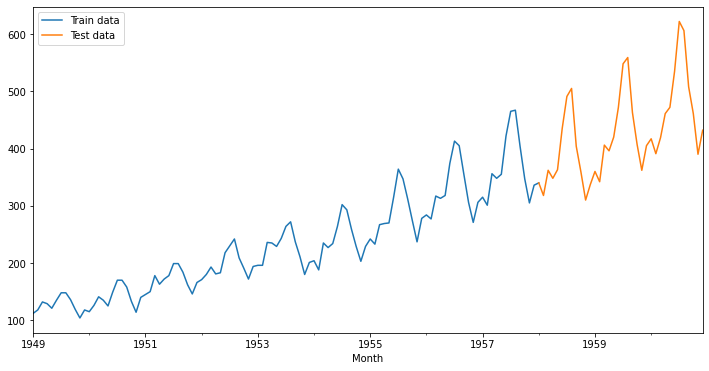

In [43]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train data',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='Test data',figsize=(12,6))

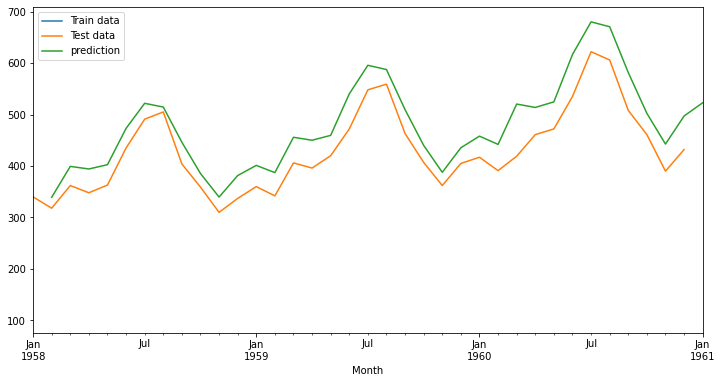

In [44]:
train_data['Thousands of Passengers'].plot(legend=True,label='Train data',figsize=(12,6))
test_data['Thousands of Passengers'].plot(legend=True,label='Test data',figsize=(12,6))
test_predictions.plot(legend=True,label='prediction',xlim=['1958-01-01','1961-01-01'])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(test_data,test_predictions)

63.03138491847624

In [47]:
mean_squared_error(test_data,test_predictions)

5614.4207149269

In [48]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [49]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92943823976594

In [50]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [51]:
forecast_predictions = final_model.forecast(steps=36)

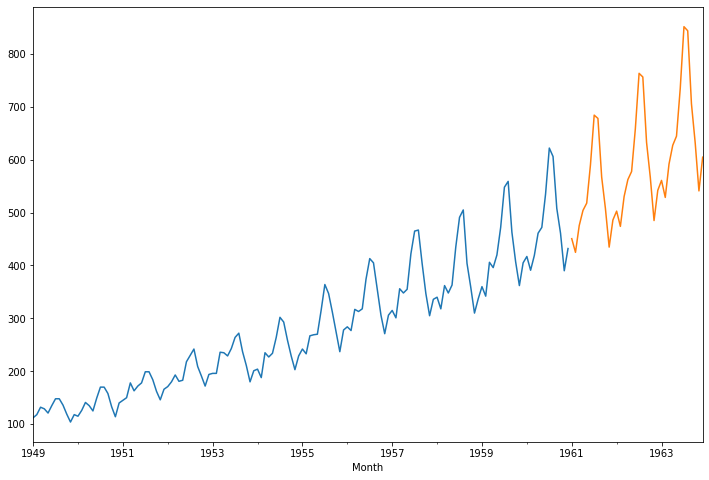

In [54]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [58]:
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)

In [59]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


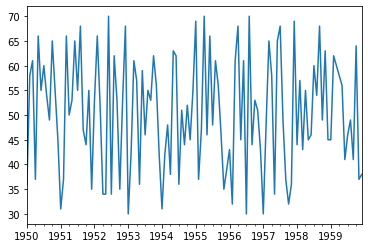

In [60]:
df2['a'].plot()

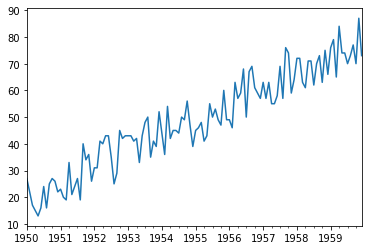

In [61]:
df2['b'].plot()

In [63]:
from statsmodels.tsa.statespace.tools import diff

In [65]:
#df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

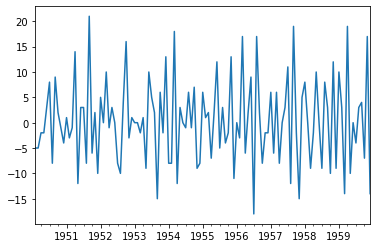

In [67]:
diff(df2['b'],k_diff=1).plot()